In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import os

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
figdir = '/g/data/v45/aek156/figures/access-om2-01/plot_temp_u_eq_ACCESS-OM2-01/'
if not os.path.exists(figdir):
    os.makedirs (figdir)

def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname),dpi=200, bbox_inches="tight")  # comment out to disable saving
    return

In [4]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
# expt = 'KDS75_newbathy_JRA' 
expt = '01deg_jra55v13_ryf8485_spinup6'

In [5]:
temp = cc.get_nc_variable(expt, ncfile, 'temp',
                        chunks={'st_ocean': None}, # n=9,
                        time_units="days since 1900-01-01")

u = cc.get_nc_variable(expt, ncfile, 'u',
                        chunks={'st_ocean': None}, # n=9,
                        time_units="days since 1900-01-01")

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

In [8]:
# Definition the Pacific region: Depth 0-300 meters, Latitude 8S-10N, Longitude along 140W
upper_temp_140w = temp.sel(time=slice('1904-01','1913-12')).sel(st_ocean=slice(0,300)).sel(yt_ocean=slice(-8,10)).sel(xt_ocean=-140.,method='nearest')
upper_temp_140w += -273.15  # convert from K to C
mean_upper_temp_140w = upper_temp_140w.mean('time')

In [9]:
# Definition the Pacific region: Depth 0-300 meters, Latitude 8S-10N, Longitude along 140W
upper_u_140w = u.sel(time=slice('1904-01','1913-12')).sel(st_ocean=slice(0,300)).sel(yu_ocean=slice(-8,10)).sel(xu_ocean=-140.,method='nearest')
# mean along the 140wuator and time mean 
mean_upper_u_140w = upper_u_140w.mean('time')

In [10]:
dep = upper_u_140w.st_ocean
lat_140w = upper_temp_140w.yt_ocean
lat_u_140w = upper_u_140w.yu_ocean

In [11]:
obs_file = xr.open_dataset('/g/data1/v45/fw4078/obs-data/meanfit_m.cdf')
obs_temp = obs_file['POTEMPM']
obs_temp_140w = obs_temp.sel(ZDEP1_50=slice(0,300)).sel(XLON=220, method='nearest')
lat_obs = obs_temp_140w.YLAT11_101
dep_obs = obs_temp_140w.ZDEP1_50

In [12]:
obs_u = obs_file['UM']
obs_u_140w = obs_u.sel(ZDEP1_50=slice(0,300)).sel(XLON=220., method='nearest')
lat_u_obs = obs_u_140w.YLAT11_101

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


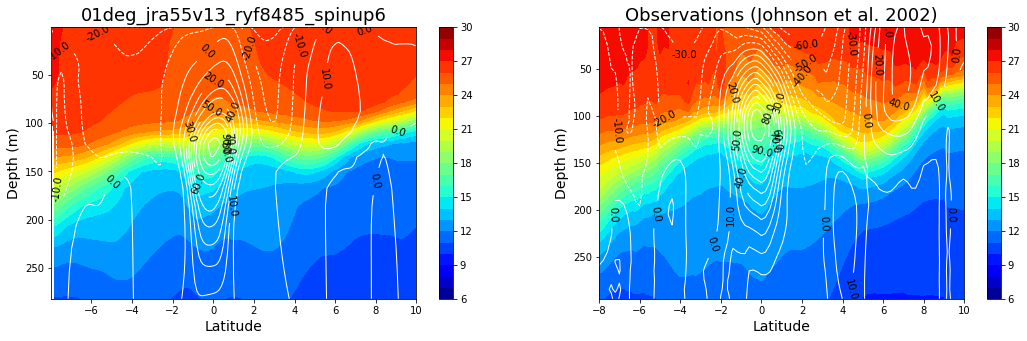

In [15]:
tlevels = np.arange(6,31,1)
ulevels = np.arange(-120,121,10)

fig_140wobs = plt.figure( figsize=(18,5) )

ax = fig_140wobs.add_subplot(121)
#ax.set_axis_bgcolor('gray')
# ax1 = ax.contourf(lat_140w, dep, mean_upper_temp_140w, cmap=plt.cm.jet, vmin=8., vmax=30.)
ax1 = ax.contourf(lat_140w, dep, mean_upper_temp_140w, cmap=plt.cm.jet, levels=tlevels)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lat_u_140w, dep, mean_upper_u_140w*100, colors = 'w', linewidths=1,levels=ulevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lat_u_140w, dep, mean_upper_u_140w, 8, colors='black')
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title(expt, fontsize=18)

ax = fig_140wobs.add_subplot(122)
#ax.set_axis_bgcolor('gray')
# ax1 = ax.contourf(lat_obs, dep_obs, obs_temp_140w, cmap=plt.cm.jet, vmin=8., vmax=30.)
ax1 = ax.contourf(lat_obs, dep_obs, obs_temp_140w, cmap=plt.cm.jet, levels=tlevels)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lat_u_obs, dep_obs, obs_u_140w*100, colors = 'w', linewidths=1,levels=ulevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lat_u_140w, dep, mean_upper_u_140w, 8, colors='black')
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title('Observations (Johnson et al. 2002)', fontsize=18)

savefigure('temp_u_140w.png')

#fig_140wobs.suptitle('SST alatg the Pacific 140wuator ($^\circ$C)', fontsize=22)
#plt.savefig('seasonal_cycle.png')